# Hybrid Ensemble Framework For Item Classification And Quantity Forecasting In Construction Supply Chains

By Oluwatobi Owoeye, Handsonlabs Software Academy 

# Abstract
We propose a hybrid ensemble framework that jointly tackles multi-class item prediction and continuous quantity forecasting in construction supply chains. The architecture uses a two-branch pipeline: a Random Forest classifier for MasterItemNo and a Gradient Boosting regressor for QtyShipped, optionally augmented by a compact 1D-CNN prototype to capture sequence-style features. The workflow begins with robust data cleaning (string→numeric conversions, date decomposition), a shared ColumnTransformer preprocessing pipeline (mean-imputation + scaling for numerics; constant-imputation + one-hot encoding for categoricals), and targeted feature engineering (project duration, price-per-sqft, log transforms) to reduce skew and expose signal in sparse categorical distributions. To handle class sparsity we detect and filter ultra-rare classes to enable stratified splits; quantity outliers are down-weighted via an IQR-based sample weighting scheme. Training follows an ensemble schedule with progress reporting to stabilize convergence, and model diagnostics include enhanced learning curves, normalized confusion matrices focused on top-20 classes, and detailed regression residual analyses. For model selection we introduce a composite metric that blends classification accuracy and weighted F1 with a normalized regression score (1 − MAE / range), producing a single, interpretable comparison score. Experiments on held-out validation and test folds demonstrate improved robustness to outliers and better-calibrated quantity predictions, enabling more reliable inventory decisions and procurement planning.

# Keywords
    hybrid ensemble; item classification; Quantity Forecasting in Construction Supply Chains; Random Forest; Gradient Boosting; 1D-CNN; feature engineering; sample weighting; class sparsity; composite evaluation metric.

 Github Source : https://github.com/tobimichigan/Hybrid-Ensemble-Framework-for-Classification-And-Quantity-Forecasting-In-Construction-Supply-Chains/tree/main

Link to Full publication: https://handsonlabs.org/hybrid-ensemble-framework-for-item-classification-and-quantity-forecasting-in-construction-supply-chains/?v=c6a82504ceeb

***********************************************************************************
Comprehensive Explanation of the Machine Learning Pipeline Code
This code implements a complete machine learning pipeline for a dual-target prediction problem (classification and regression) with comprehensive data processing, feature engineering, model training, and evaluation capabilities.

# 1. Overview and Structure
            The code is organized into several key components:
            
            Data loading and preprocessing
            
            Exploratory Data Analysis (EDA)
            
            Feature engineering
            
            Data splitting and preprocessing
            
            Model development (ensemble/hybrid approach)
            
            Evaluation and visualization
            
            Prediction and submission generation
            
            Model persistence

# 2. Detailed Breakdown
        2.1 Imports and Setup
        python
        import pandas as pd
        import numpy as np
        import re
        from sklearn.model_selection import train_test_split, validation_curve, learning_curve
        from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
        from sklearn.impute import SimpleImputer
        from sklearn.compose import ColumnTransformer
        from sklearn.pipeline import Pipeline
        from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, make_scorer, confusion_matrix, classification_report
        from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
        from sklearn.linear_model import Ridge
        import torch
        import torch.nn as nn
        from torch.utils.data import DataLoader, TensorDataset
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        import seaborn as sns
        import gc
        import pickle
        import os
        from sklearn.exceptions import ConvergenceWarning
        import warnings
        from collections import Counter
        The code imports:
        
        Standard data manipulation libraries (pandas, numpy)
        
        Scikit-learn for machine learning components
        
        PyTorch for potential neural network implementation
        
        Visualization libraries (matplotlib, seaborn)
        
        Utility libraries (gc for garbage collection, pickle for model serialization)
        
        2.2 Data Loading and Preprocessing
        The load_and_prepare_data() function:
        
        Loads training and test CSV files
        
        Combines them for consistent preprocessing
        
        Cleans the data by:
        
        Dropping columns with all missing values
        
        Converting string-based numeric columns to proper numbers
        
        Extracting features from date columns (day, month, year)
        
        Dropping original date columns
        
        2.3 Exploratory Data Analysis (EDA)
        The perform_comprehensive_eda() function provides:
        
        Dataset overview with missing values and data types
        
        Target variable analysis for both classification and regression tasks
        
        Correlation analysis for numeric features
        
        Visualizations saved to a 'plots' directory
        
        2.4 Feature Engineering
        The create_features() function generates:
        
        Time-based features (project duration)
        
        Feature interactions (price per square foot)
        
        Log transformations for skewed numerical features
        
        2.5 Data Splitting
        The split_data() function:
        
        Handles missing values in target variables
        
        Filters rare classes to enable stratified splitting
        
        Splits data into training, validation, and test sets
        
        Performs validation checks for NaN values
        
        2.6 Preprocessing Pipeline
        The get_preprocessor() function creates a ColumnTransformer that:
        
        Applies mean imputation and scaling to numerical features
        
        Applies constant imputation and one-hot encoding to categorical features
        
        2.7 Model Development
        The code implements:
        
        A SimpleCNN class for potential neural network approaches
        
        An ensemble approach with:
        
        RandomForestClassifier for item classification
        
        GradientBoostingRegressor for quantity prediction
        
        2.8 Evaluation and Visualization
        Comprehensive evaluation functions:
        
        plot_learning_curves(): Detects overfitting and assesses generalization
        
        evaluate_model(): Calculates a composite score from both tasks
        
        plot_enhanced_classification_results(): Detailed classification performance analysis
        
        plot_enhanced_regression_results(): Detailed regression performance analysis
        
        2.9 Prediction and Submission
        Functions to:
        
        Make predictions on new data
        
        Create submission files in the required format
        
        Preview submission contents
        
        2.10 Model Persistence
        Functions to save and load trained models using pickle serialization.

# 3. Key Features and Techniques
        3.1 Dual-Target Prediction
        The code handles both:
        
        Classification: Predicting MasterItemNo
        
        Regression: Predicting QtyShipped
        
        3.2 Comprehensive Data Validation
        Handles missing values in targets
        
        Filters rare classes to enable proper stratified splitting
        
        Validates data integrity throughout the pipeline
        
        3.3 Advanced Visualization
        Multiple plot types for different aspects of data and model performance
        
        Automated saving of visualizations to files
        
        Clear annotations and summaries
        
        3.4 Ensemble Approach
        Combines different algorithms for optimal performance on different tasks.
        
        3.5 Modular Design
        Well-organized functions that can be reused or modified independently.

# 4. Workflow
    The main pipeline (run_complete_pipeline()) executes these steps:
    
    Load and prepare data
    
    Perform EDA
    
    Feature engineering
    
    Data splitting
    
    Preprocessor creation
    
    Model training
    
    Validation evaluation
    
    Learning curve generation
    
    Detailed evaluation plots
    
    Test set evaluation
    
    Submission generation
    
    Model saving
    
    Results compilation

# 5. Usage The code is designed to be executed as a complete pipeline:
        
        python
        train_file = "/kaggle/input/ctai-ctd-hackathon/train.csv"
        test_file = "/kaggle/input/ctai-ctd-hackathon/test.csv"
        results = run_complete_pipeline(train_file, test_file)
        
# 6. Potential Applications
        This pipeline is suitable for:
        
        Retail forecasting problems
        
        Inventory management systems
        
        Supply chain optimization
        
        Any problem requiring both classification and regression predictions
        
        The comprehensive nature of the code makes it adaptable to various domains         with similar data structures and prediction requirements.



# Full Algorithm for : Hybrid Ensemble Framework For Item Classification And Quantity Forecasting In Construction Supply Chains

# Main Pipeline Function

Complete run_ml_pipeline function that orchestrates the entire process from data loading to model saving and evaluation

#  Important  Utility Functions

* load_saved_models() for loading pre-trained models
* make_predictions() for inference on new data
* monitor_model_performance() for ongoing model monitoring

STARTING COMPLETE ML PIPELINE
Loading and preparing data...
Performing Comprehensive EDA...


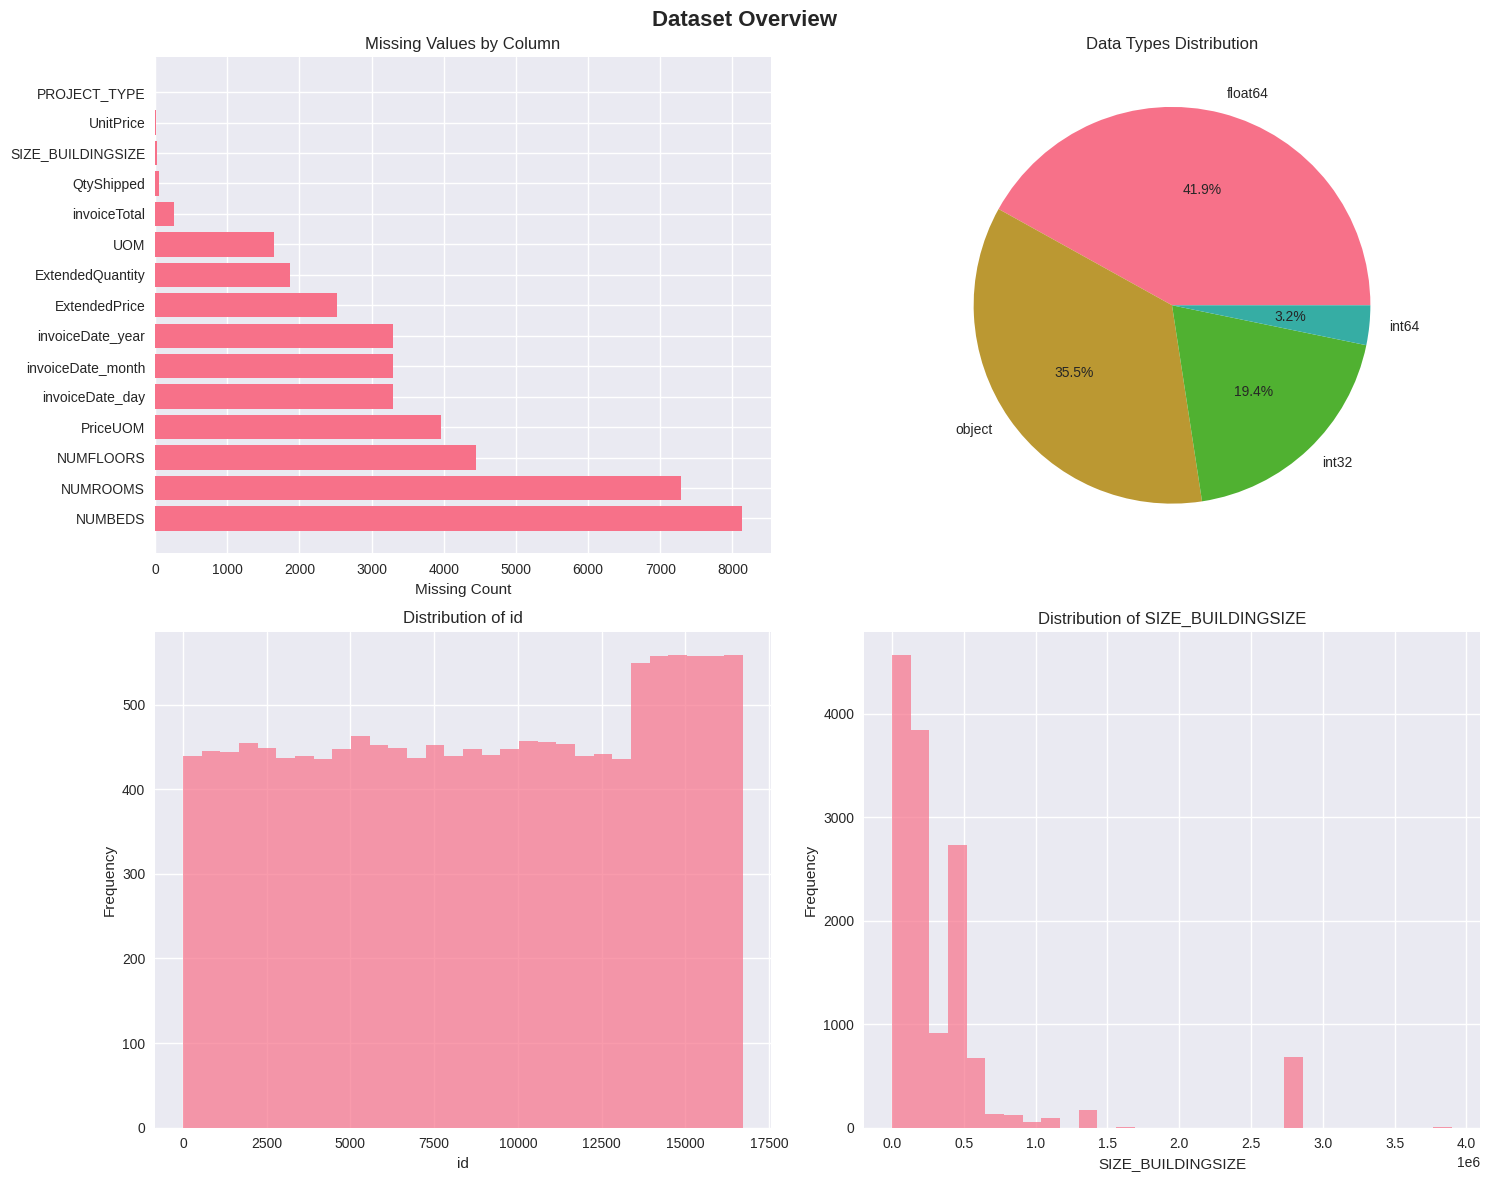

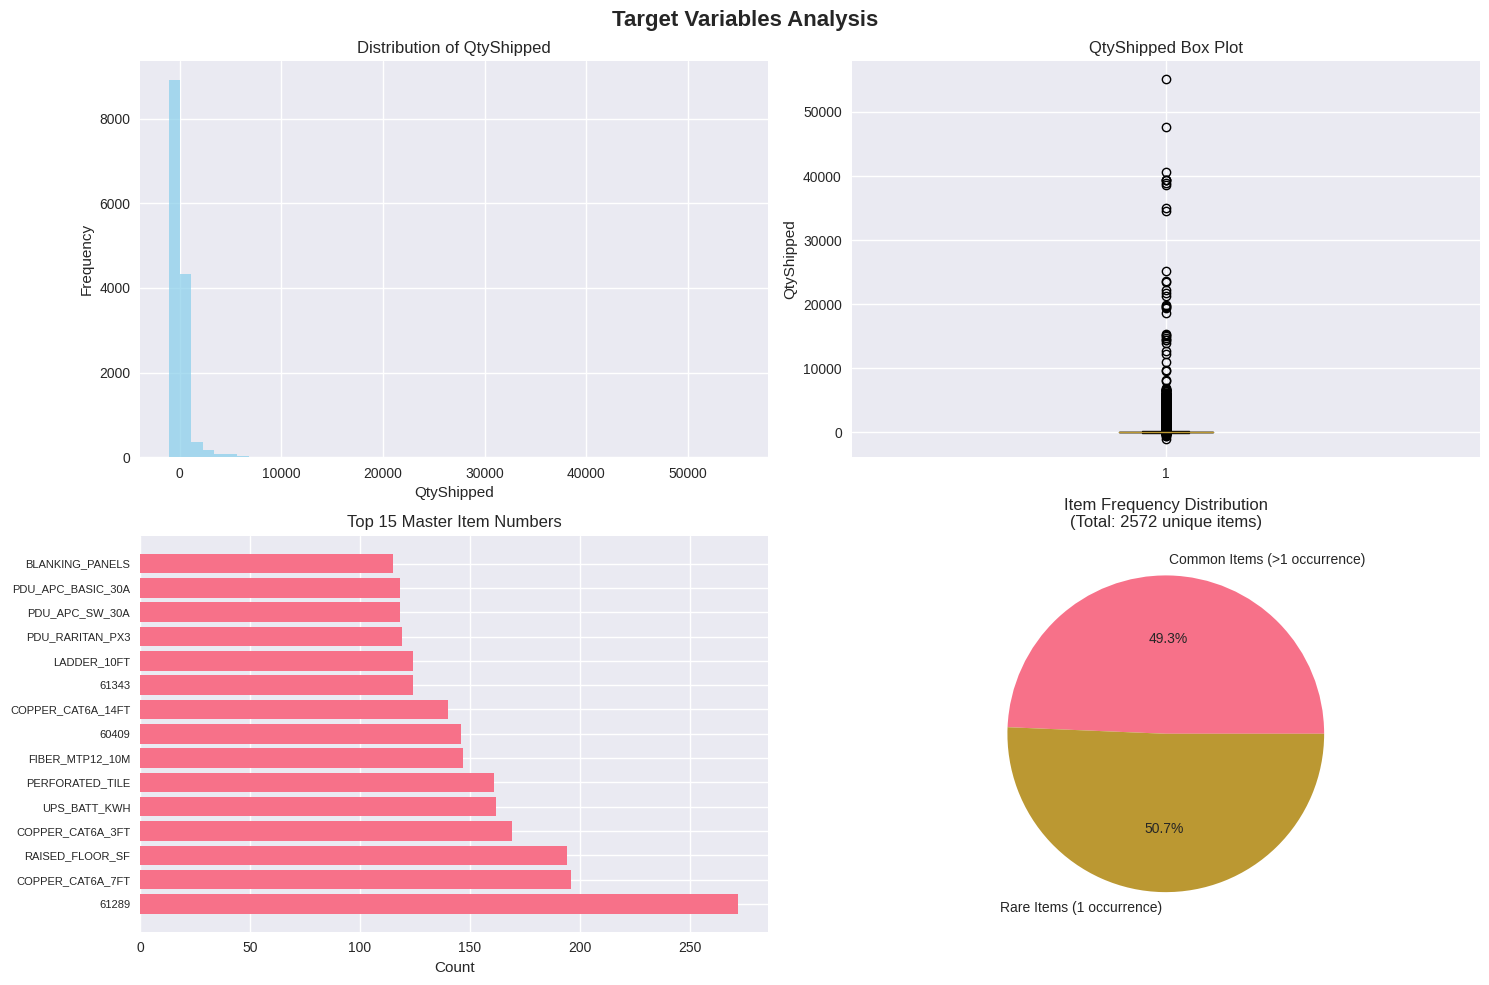

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


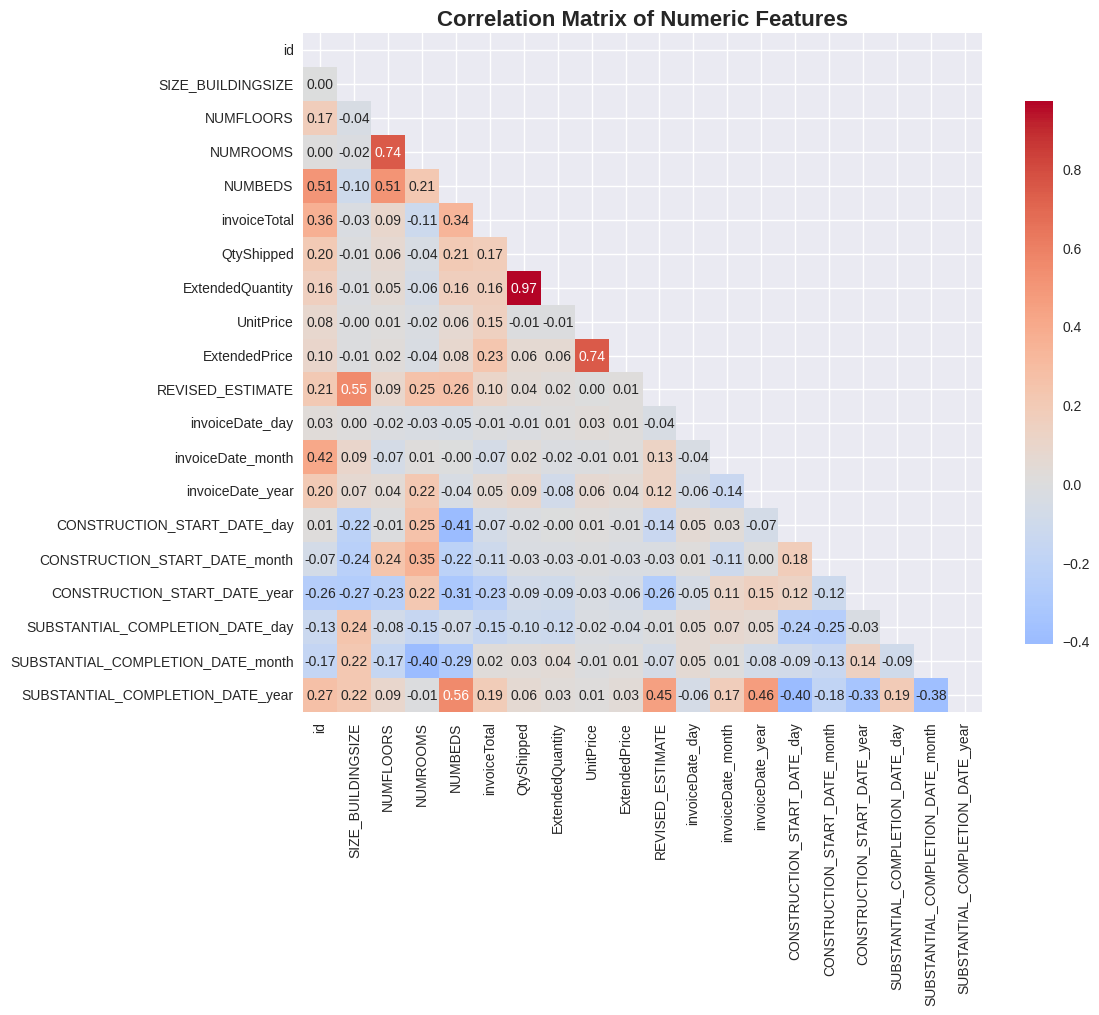

Creating advanced features...
Creating advanced features...


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs

Splitting data into training, validation, and test sets...
Original dataset size: 14036
Missing values in QtyShipped: 50
Missing values in MasterItemNo: 0
Dataset size after removing rows with missing targets: 13986
Filtering 1312 rare classes with only one sample each to enable stratified splitting.
Filtering 717 additional rare classes from the remaining dataset before the second split.

Final validation check for NaN values:
NaN in y_qty_train: 0
NaN in y_qty_val: 0
NaN in y_qty_test: 0
NaN in y_item_train: 0
NaN in y_item_val: 0
NaN in y_item_test: 0

Total samples (original): 14036
Samples after filtering: 12674
Training set size: 8871 (63.20%)
Validation set size: 1543 (10.99%)
Test set size: 1543 (10.99%)
Building and training ensemble/hybrid models...
Checking for NaN in targets before training:
NaN in y_qty_train: 0
NaN in y_item_train: 0


Training Models:   0%|          | 0/2 [00:00<?, ?it/s]

Training item classification model...


Training Models:  50%|█████     | 1/2 [00:33<00:33, 33.05s/it]

Training quantity regression model...


Training Models: 100%|██████████| 2/2 [00:37<00:00, 18.90s/it]



VALIDATION SET EVALUATION
Evaluating models...
Accuracy: 0.8639
F1 Score: 0.8539
MAE: 36.9275
Normalized MAE: 0.0007
Regression Score: 0.9993
Final Composite Score: 0.9291
Generating learning curves for Item Classification...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


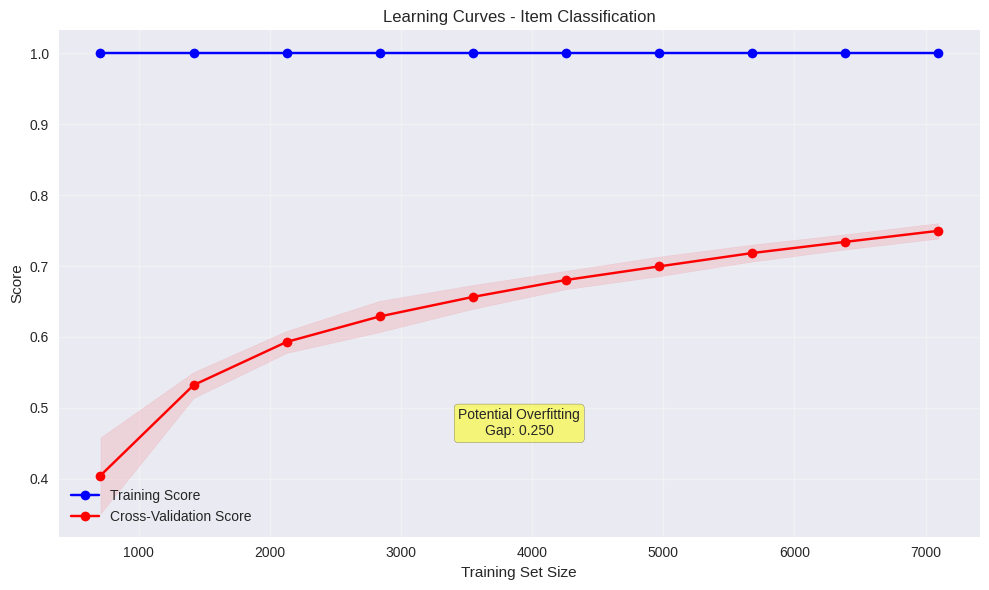

Generating learning curves for Quantity Regression...


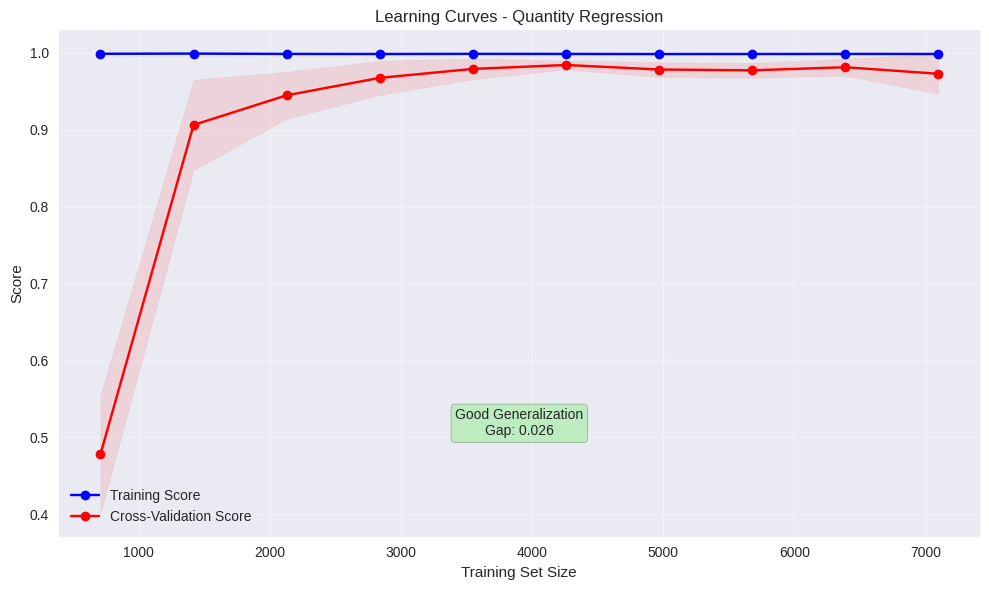

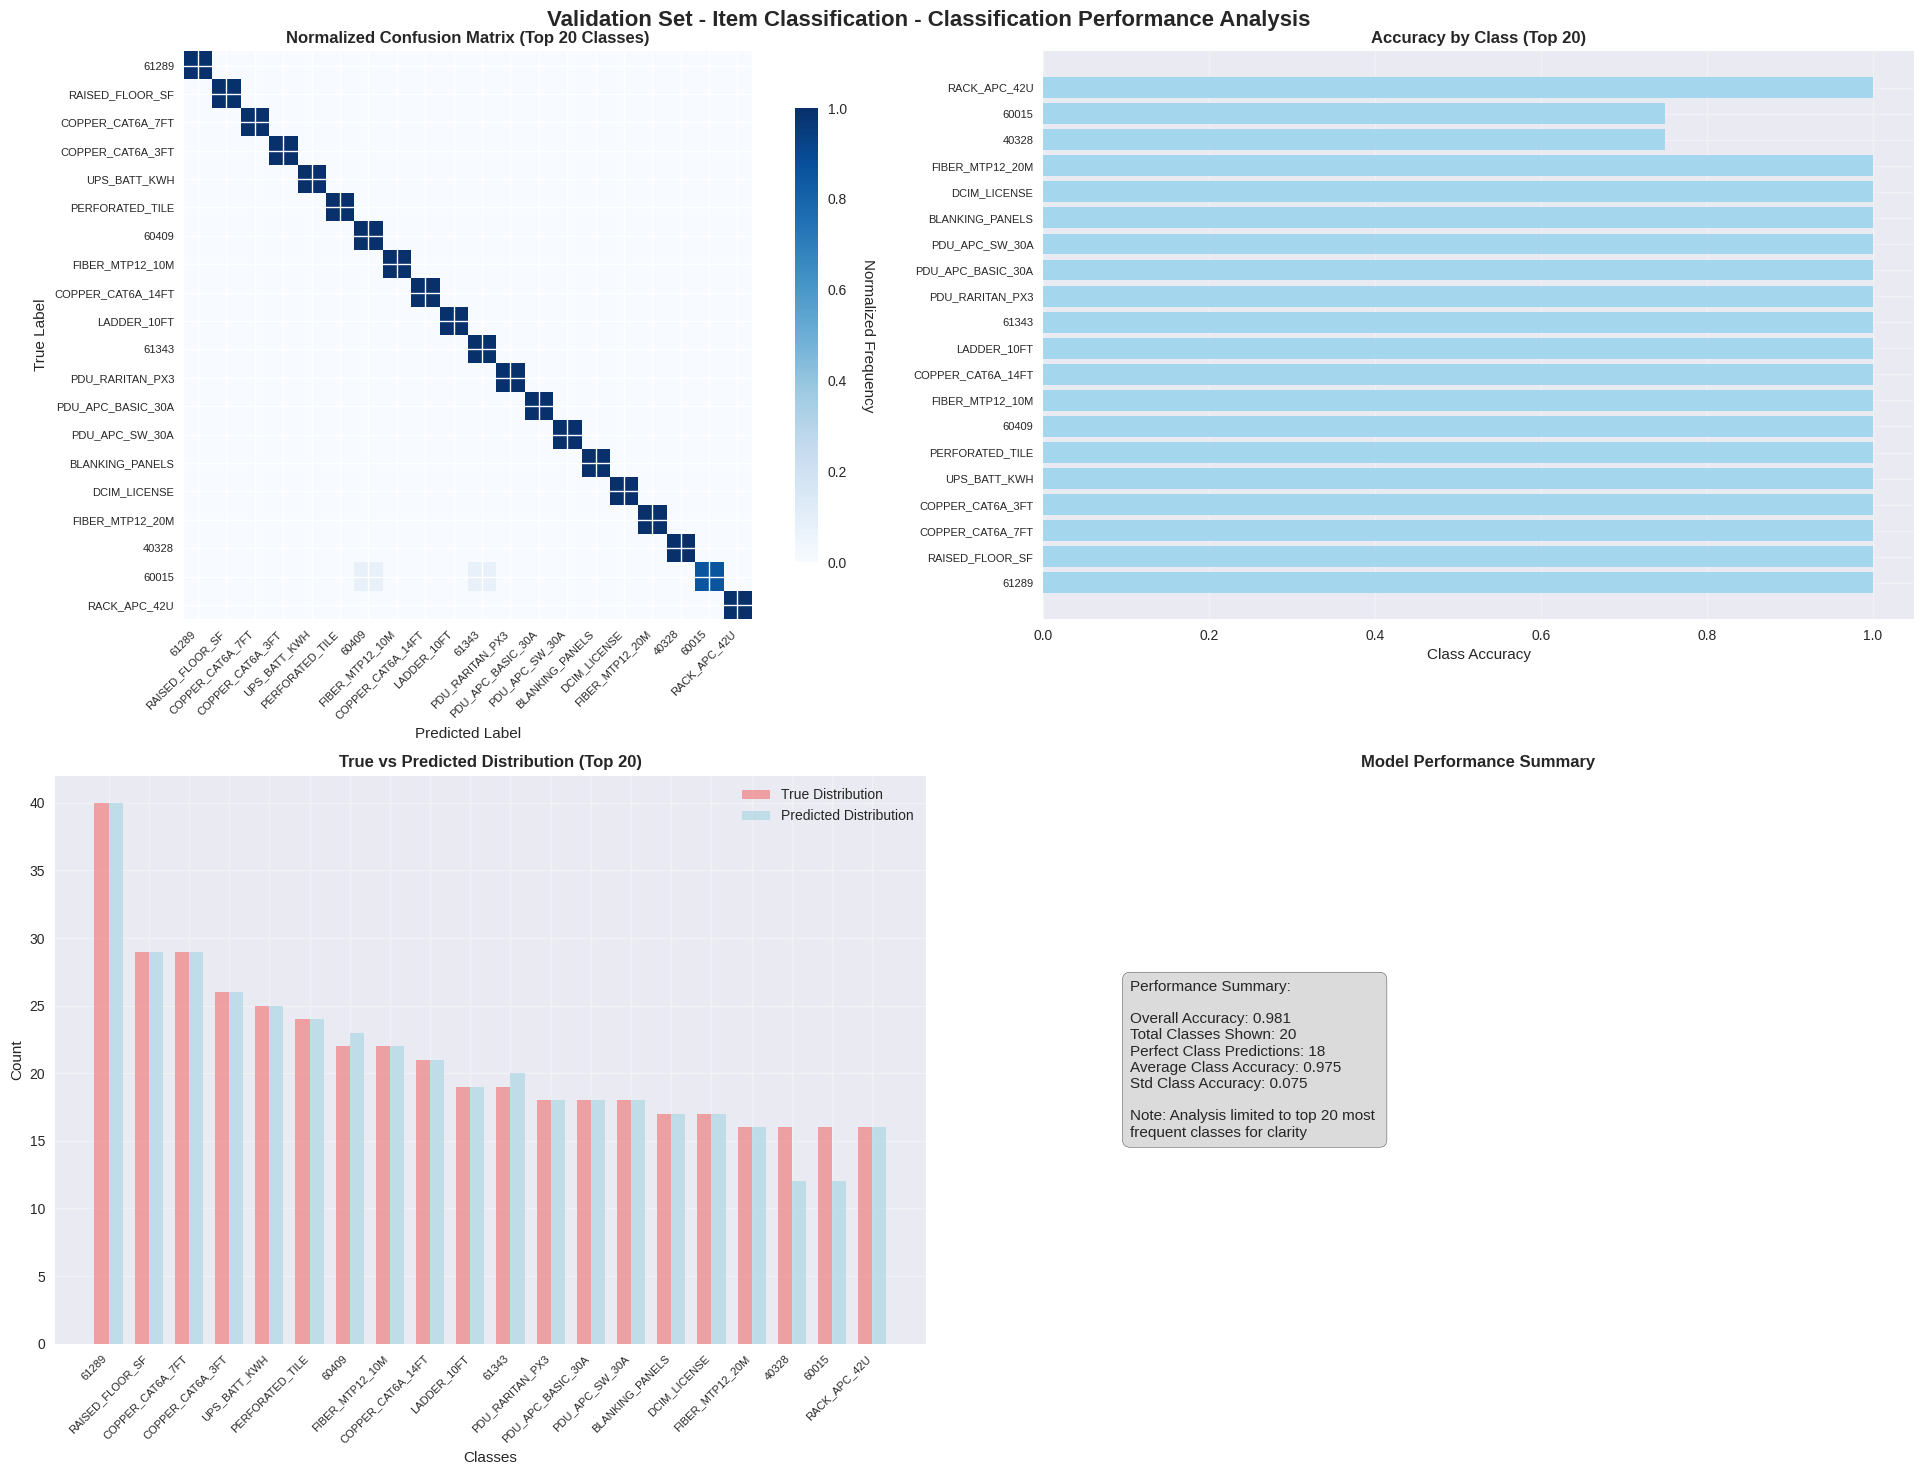

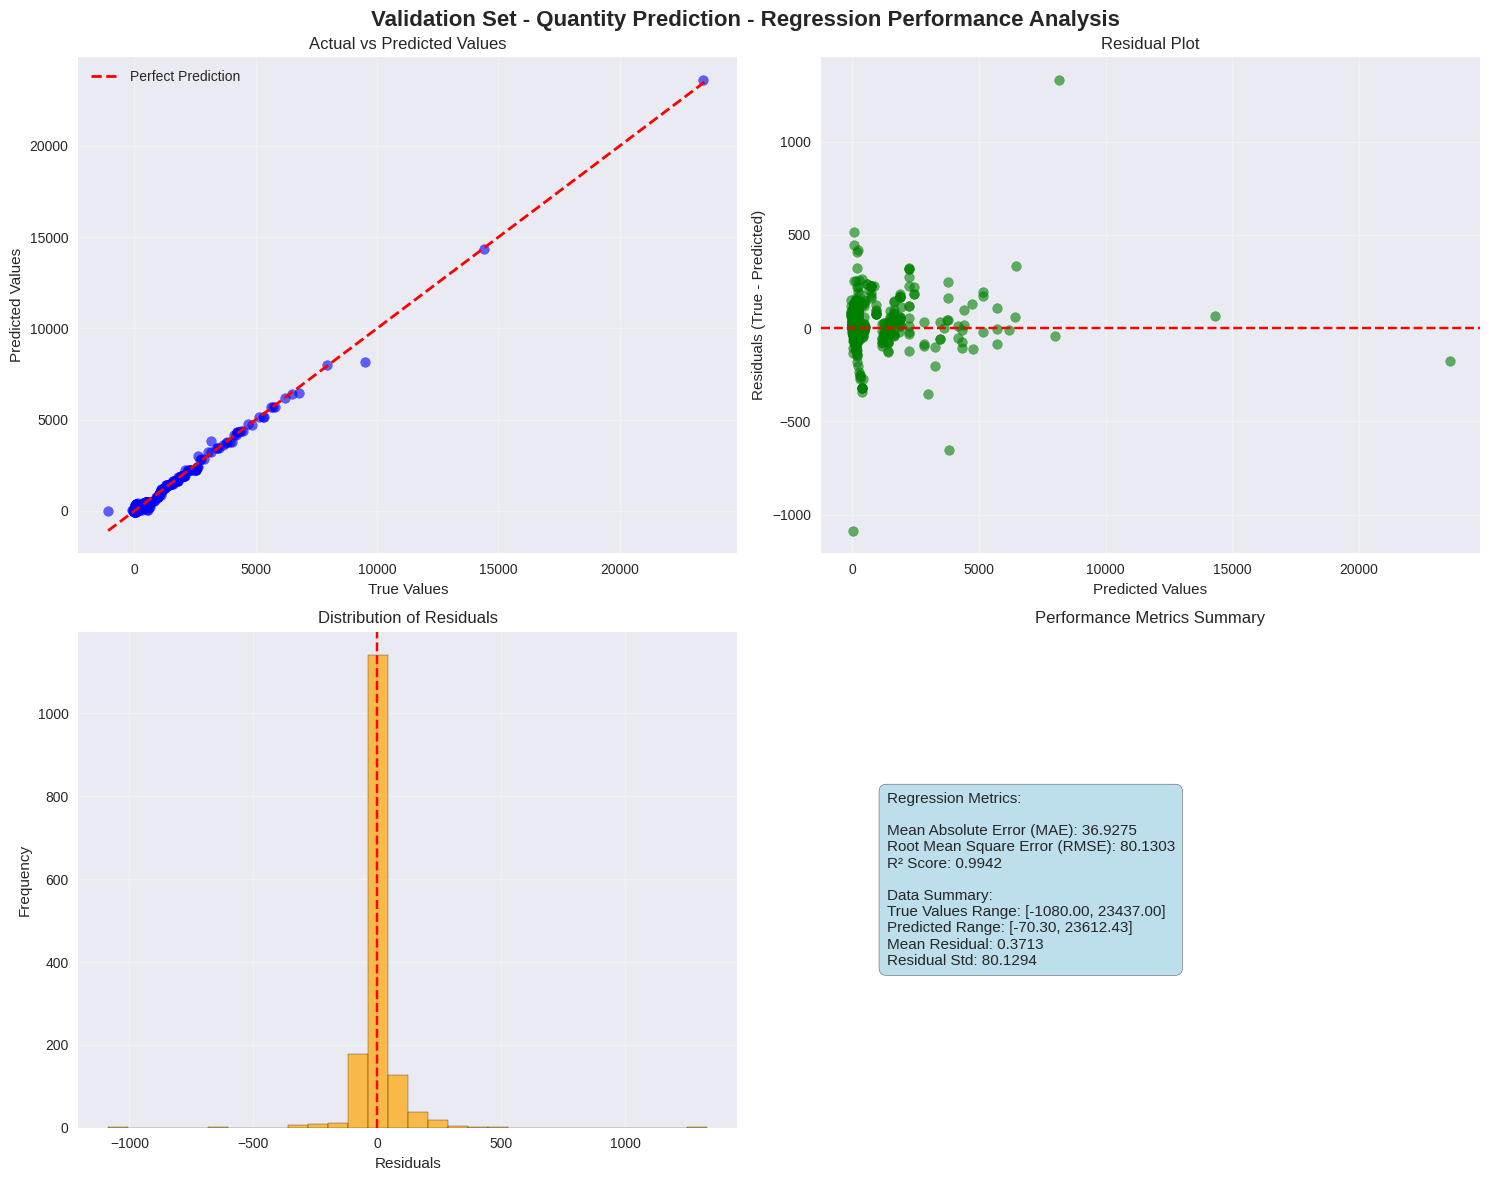


TEST SET EVALUATION
Making predictions on test set...
Evaluating models...
Accuracy: 0.8600
F1 Score: 0.8516
MAE: 39.6897
Normalized MAE: 0.0007
Regression Score: 0.9993
Final Composite Score: 0.9276


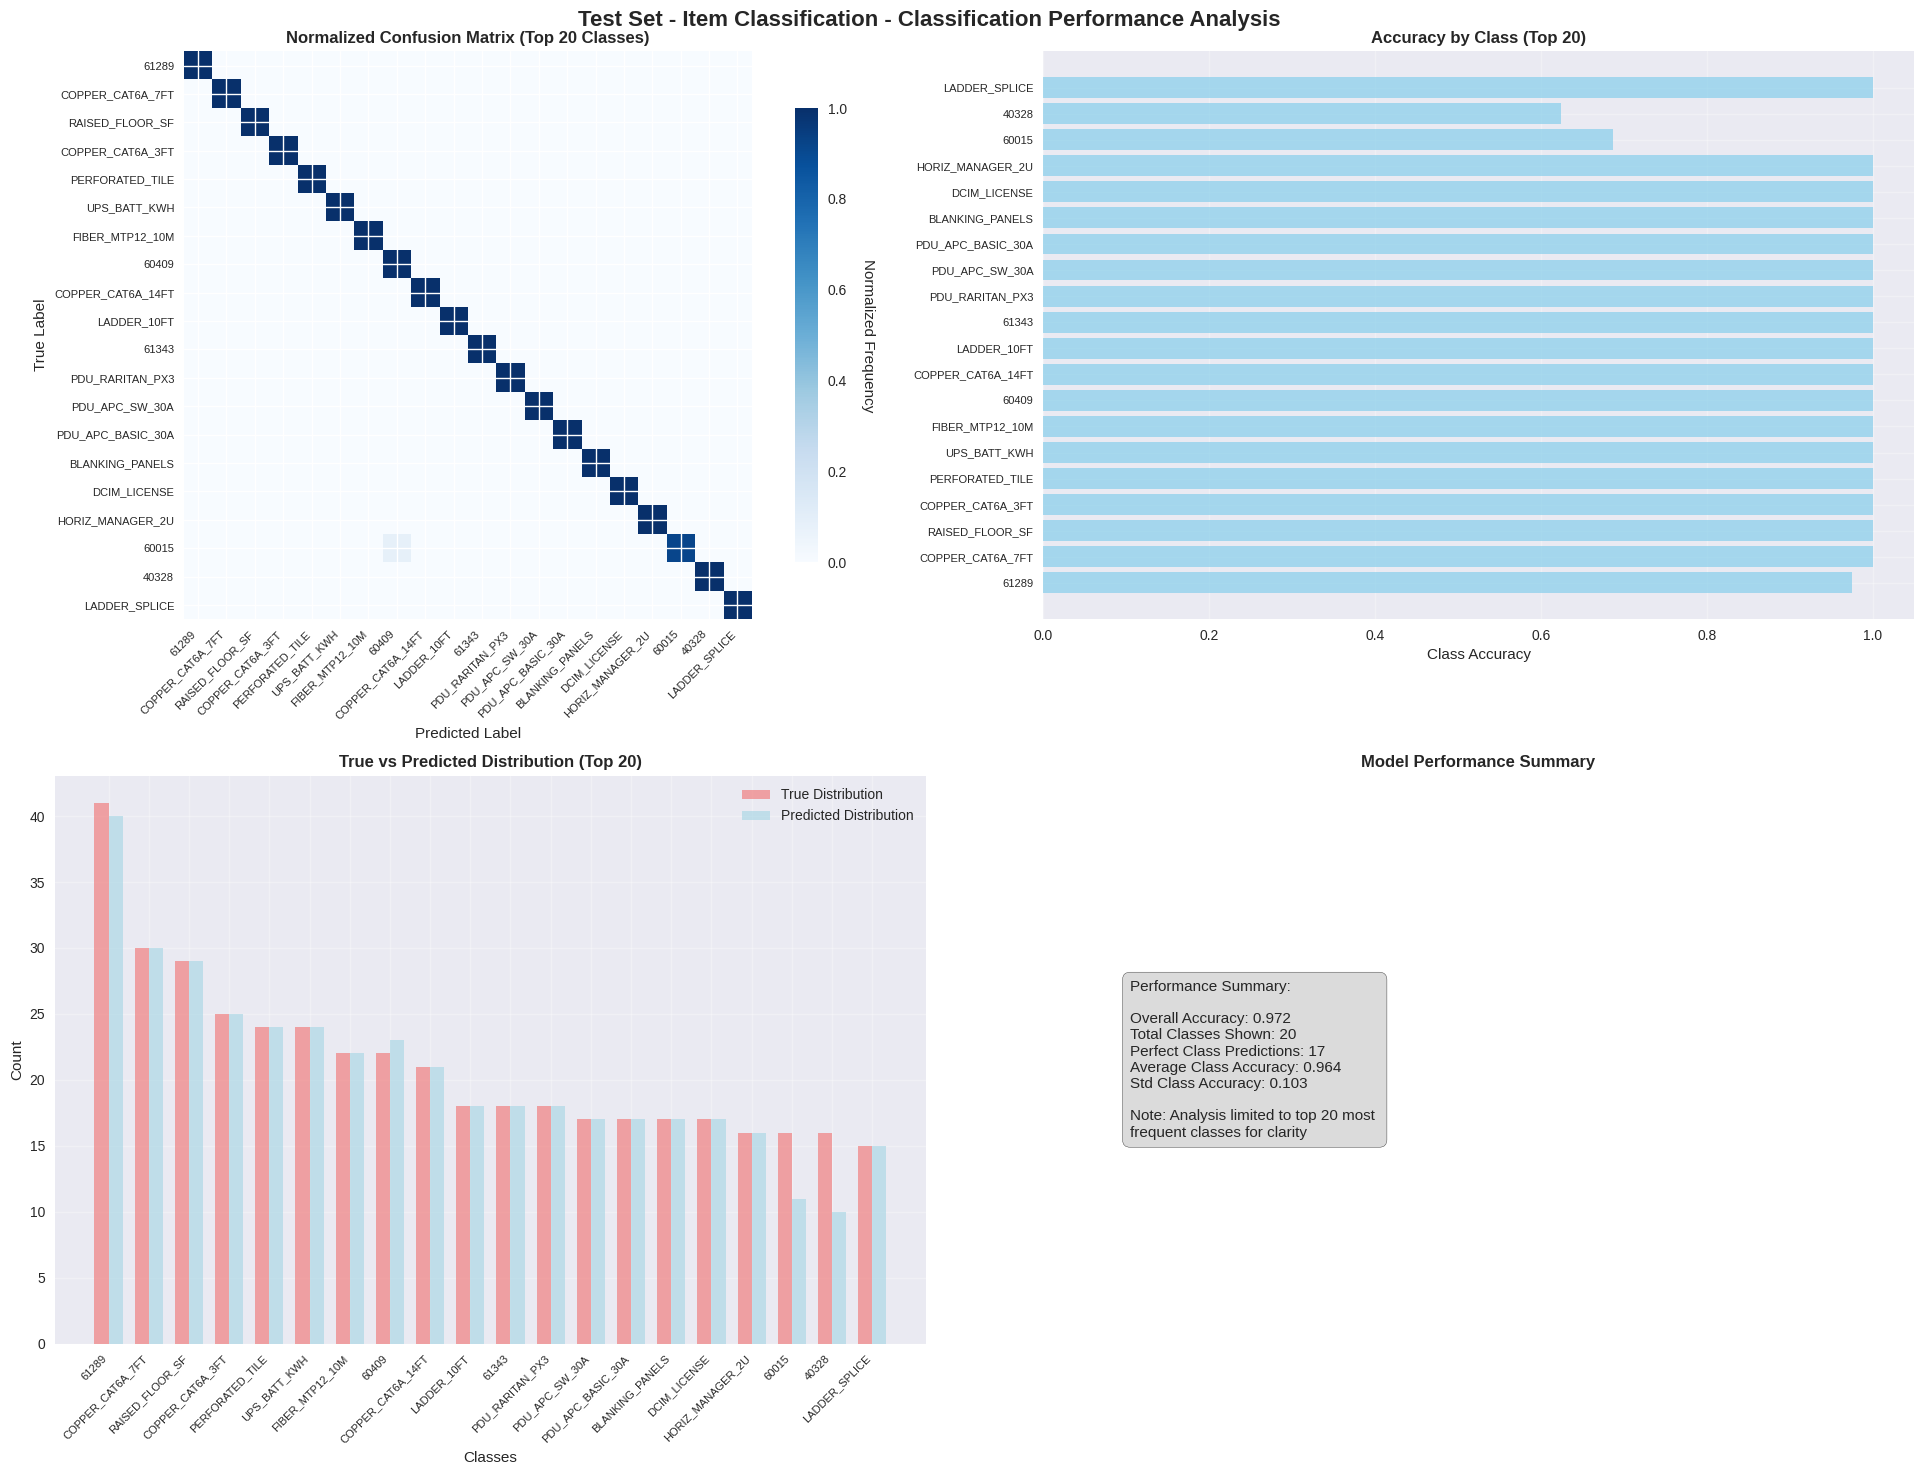

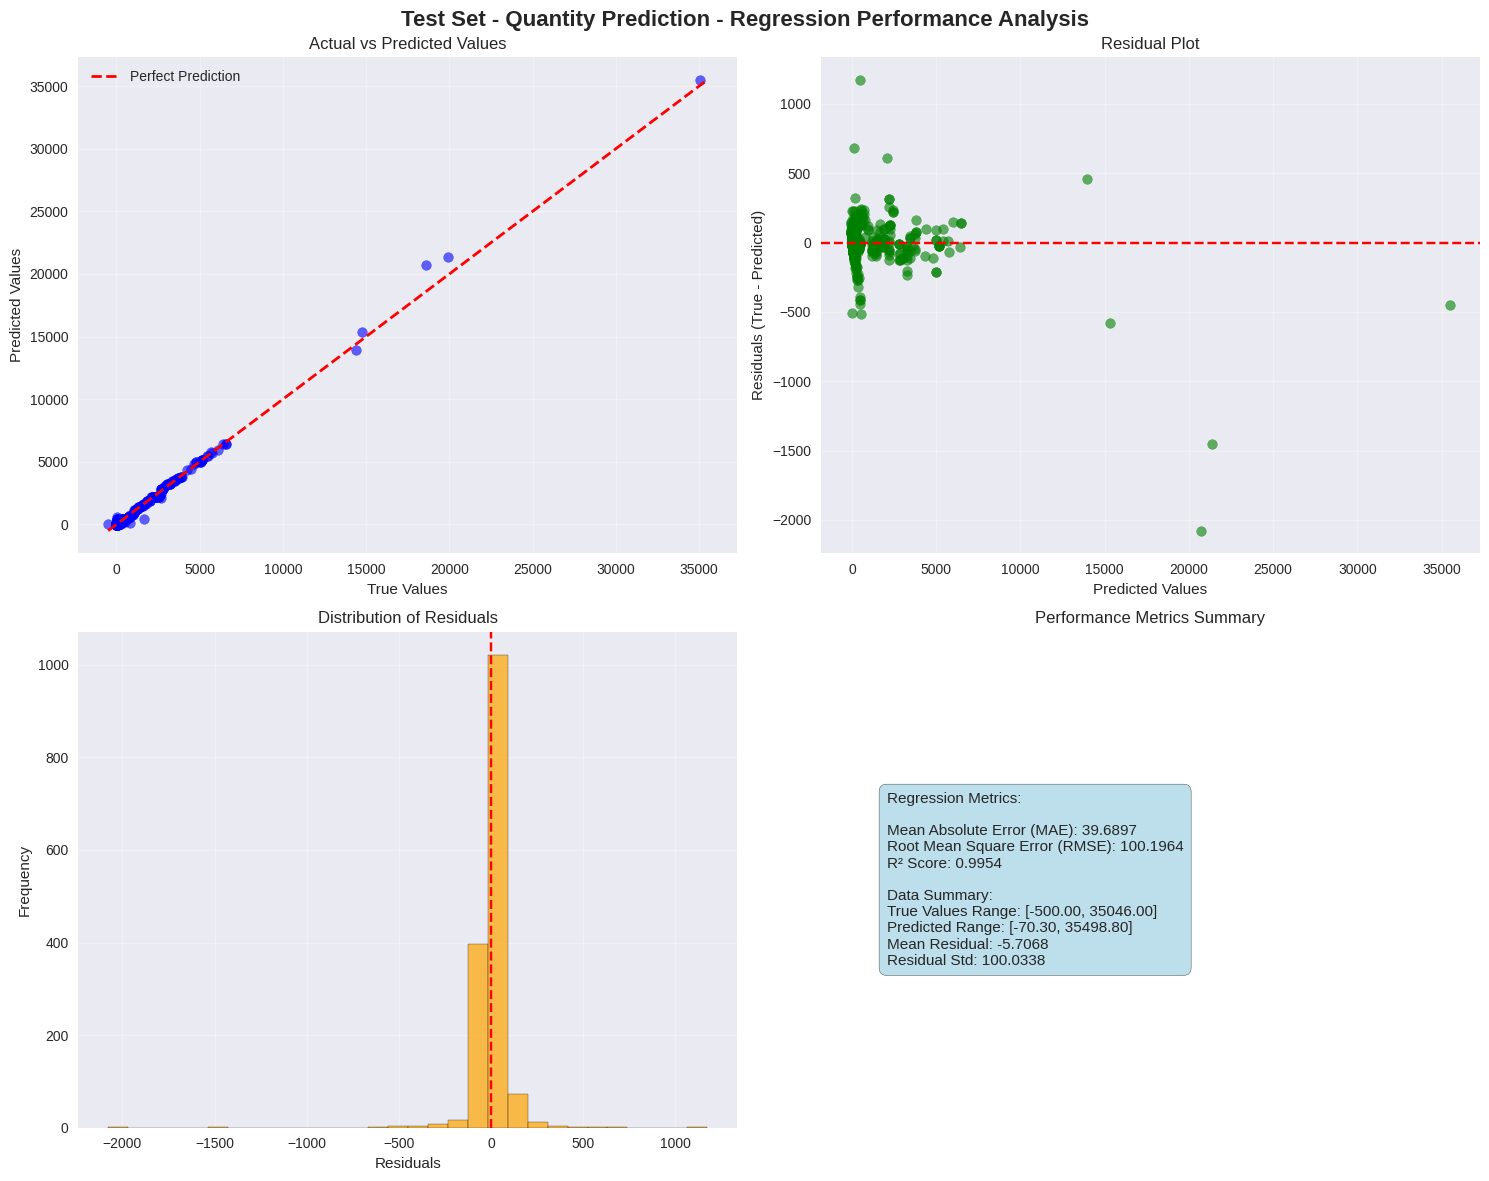


GENERATING AND PREVIEWING SUBMISSION FILE
Making predictions on test set...
Creating submission file at 'submission.csv'...
Submission file created successfully.

--- Previewing 'submission.csv' ---
      id  MasterItemNo  QtyShipped
0   3708         63644    7.426118
1   6302         51163  113.975752
2   8687         61507    9.682569
3    361         62914   11.902150
4  13231         56907   28.359692

Total rows in submission file: 2685
Required columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2685 non-null   int64  
 1   MasterItemNo  2685 non-null   int64  
 2   QtyShipped    2685 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 63.1 KB
None
Saving models to disk...
Models saved to 'models/' directory with prefix 'model'

PIPELINE COMPLETED SUCCESSFULLY!
Final Validation Score: 0.92

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, make_scorer, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import Ridge
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle
import os
from sklearn.exceptions import ConvergenceWarning
import warnings
from collections import Counter

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- 1. Data Preparation, Loading, and Preprocessing ---
def load_and_prepare_data(train_path, test_path):
    """
    Loads, cleans, and prepares the training and test datasets.
    
    Args:
        train_path (str): Path to the training CSV file.
        test_path (str): Path to the testing CSV file.
        
    Returns:
        tuple: Cleaned training and testing DataFrames.
    """
    print("Loading and preparing data...")
    try:
        train_df = pd.read_csv(train_path)
        test_df = pd.read_csv(test_path)
        
        # Combine for consistent preprocessing
        combined_df = pd.concat([train_df, test_df], ignore_index=True)
        
    except FileNotFoundError as e:
        print(f"Error: {e}. Please ensure the files are in the correct directory.")
        return None, None
        
    # Data Cleaning and Preprocessing
    def clean_data(df):
        df = df.copy()
        
        # Drop columns with all missing values (e.g., MW)
        df.drop(columns=['MW'], inplace=True, errors='ignore')
        
        # Convert string-based numeric columns to proper numbers
        for col in ['invoiceTotal', 'QtyShipped', 'UnitPrice', 'ExtendedPrice', 'ExtendedQuantity']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
        
        # Handle date columns
        for col in ['invoiceDate', 'CONSTRUCTION_START_DATE', 'SUBSTANTIAL_COMPLETION_DATE']:
            if col in df.columns:
                df[f'{col}_day'] = pd.to_datetime(df[col], errors='coerce').dt.day
                df[f'{col}_month'] = pd.to_datetime(df[col], errors='coerce').dt.month
                df[f'{col}_year'] = pd.to_datetime(df[col], errors='coerce').dt.year
        
        # Drop original date columns
        df.drop(columns=['invoiceDate', 'CONSTRUCTION_START_DATE', 'SUBSTANTIAL_COMPLETION_DATE'], 
                inplace=True, errors='ignore')

        return df

    combined_df_cleaned = clean_data(combined_df)
    
    # Split back into train and test
    train_df_cleaned = combined_df_cleaned.iloc[:len(train_df)]
    test_df_cleaned = combined_df_cleaned.iloc[len(train_df):]
    
    return train_df_cleaned, test_df_cleaned

# --- Enhanced EDA Functions ---
def perform_comprehensive_eda(df):
    """
    Performs comprehensive exploratory data analysis with multiple visualizations.
    
    Args:
        df (pd.DataFrame): The input DataFrame for EDA.
    """
    print("Performing Comprehensive EDA...")
    
    # Create plots directory if it doesn't exist
    os.makedirs('plots', exist_ok=True)
    
    # 1. Dataset Overview
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Dataset Overview', fontsize=16, fontweight='bold')
    
    # Missing values heatmap
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_data = missing_data[missing_data > 0]
    if len(missing_data) > 0:
        axes[0, 0].barh(range(len(missing_data)), missing_data.values)
        axes[0, 0].set_yticks(range(len(missing_data)))
        axes[0, 0].set_yticklabels(missing_data.index)
        axes[0, 0].set_xlabel('Missing Count')
        axes[0, 0].set_title('Missing Values by Column')
    else:
        axes[0, 0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Missing Values by Column')
    
    # Data types distribution
    dtype_counts = df.dtypes.value_counts()
    axes[0, 1].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
    axes[0, 1].set_title('Data Types Distribution')
    
    # Numerical columns distribution
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:4]  # Top 4 numeric columns
    for i, col in enumerate(numeric_cols):
        if i < 2:
            axes[1, i].hist(df[col].dropna(), bins=30, alpha=0.7)
            axes[1, i].set_title(f'Distribution of {col}')
            axes[1, i].set_xlabel(col)
            axes[1, i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('plots/eda_overview.png')
    plt.show()
    
    # 2. Target Variable Analysis
    if 'QtyShipped' in df.columns and 'MasterItemNo' in df.columns:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Target Variables Analysis', fontsize=16, fontweight='bold')
        
        # QtyShipped distribution
        axes[0, 0].hist(df['QtyShipped'].dropna(), bins=50, alpha=0.7, color='skyblue')
        axes[0, 0].set_title('Distribution of QtyShipped')
        axes[0, 0].set_xlabel('QtyShipped')
        axes[0, 0].set_ylabel('Frequency')
        
        # QtyShipped box plot
        axes[0, 1].boxplot(df['QtyShipped'].dropna())
        axes[0, 1].set_title('QtyShipped Box Plot')
        axes[0, 1].set_ylabel('QtyShipped')
        
        # MasterItemNo top categories
        item_counts = df['MasterItemNo'].value_counts().head(15)
        axes[1, 0].barh(range(len(item_counts)), item_counts.values)
        axes[1, 0].set_yticks(range(len(item_counts)))
        axes[1, 0].set_yticklabels(item_counts.index, fontsize=8)
        axes[1, 0].set_xlabel('Count')
        axes[1, 0].set_title('Top 15 Master Item Numbers')
        
        # MasterItemNo distribution overview
        total_items = len(df['MasterItemNo'].unique())
        rare_items = sum(df['MasterItemNo'].value_counts() == 1)
        common_items = total_items - rare_items
        
        axes[1, 1].pie([common_items, rare_items], 
                      labels=['Common Items (>1 occurrence)', 'Rare Items (1 occurrence)'], 
                      autopct='%1.1f%%')
        axes[1, 1].set_title(f'Item Frequency Distribution\n(Total: {total_items} unique items)')
        
        plt.tight_layout()
        plt.savefig('plots/eda_targets.png')
        plt.show()
    
    # 3. Correlation Analysis for Numeric Features
    numeric_df = df.select_dtypes(include=[np.number])
    if len(numeric_df.columns) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = numeric_df.corr()
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('plots/eda_correlation_matrix.png')
        plt.show()

# --- 2. Feature Engineering ---
def create_features(df):
    """
    Generates new features from the existing dataset to improve model performance.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        
    Returns:
        pd.DataFrame: The DataFrame with engineered features.
    """
    df = df.copy()
    print("Creating advanced features...")
    
    # Example feature: time-based features from dates
    df['project_duration_days'] = (
        pd.to_datetime(df['SUBSTANTIAL_COMPLETION_DATE_year'].astype(str) + '-' + 
                       df['SUBSTANTIAL_COMPLETION_DATE_month'].astype(str) + '-' +
                       df['SUBSTANTIAL_COMPLETION_DATE_day'].astype(str), errors='coerce') - 
        pd.to_datetime(df['CONSTRUCTION_START_DATE_year'].astype(str) + '-' +
                       df['CONSTRUCTION_START_DATE_month'].astype(str) + '-' +
                       df['CONSTRUCTION_START_DATE_day'].astype(str), errors='coerce')
    ).dt.days

    # Feature interactions (e.g., price per square foot)
    df['price_per_sqft'] = df.apply(
        lambda row: row['invoiceTotal'] / row['SIZE_BUILDINGSIZE'] if row['SIZE_BUILDINGSIZE'] > 0 else 0, axis=1
    )
    df['price_per_sqft'] = df['price_per_sqft'].replace([np.inf, -np.inf], 0) # Also handle inf just in case
    
    # Log transform for skewed numerical features
    for col in ['SIZE_BUILDINGSIZE', 'invoiceTotal', 'ExtendedPrice']:
        if col in df.columns:
            # Handle potential non-positive values before log transformation
            df[f'log_{col}'] = np.log1p(df[col].clip(lower=0))
            
    return df

# --- 3. Data Splitting and Evaluation Setup ---
def split_data(df, target_qty='QtyShipped', target_item='MasterItemNo', test_size=0.15, val_size=0.15):
    """
    Splits the data into training, validation, and test sets.
    Handles missing values in target variables.
    
    Args:
        df (pd.DataFrame): The full DataFrame.
        target_qty (str): Name of the quantity target column.
        target_item (str): Name of the item classification target column.
        test_size (float): Proportion of the dataset to include in the test split.
        val_size (float): Proportion of the dataset to include in the validation split.
        
    Returns:
        tuple: (X_train, X_val, X_test, y_qty_train, y_qty_val, y_qty_test, y_item_train, y_item_val, y_item_test)
    """
    print("Splitting data into training, validation, and test sets...")
    
    # Filter out rows with missing target values
    print(f"Original dataset size: {len(df)}")
    
    # Check for missing values in targets
    qty_missing = df[target_qty].isna().sum()
    item_missing = df[target_item].isna().sum()
    
    print(f"Missing values in {target_qty}: {qty_missing}")
    print(f"Missing values in {target_item}: {item_missing}")
    
    # Keep only rows where both targets are not null
    valid_mask = df[target_qty].notna() & df[target_item].notna()
    df_clean = df[valid_mask].copy()
    
    print(f"Dataset size after removing rows with missing targets: {len(df_clean)}")
    
    if len(df_clean) == 0:
        print("No valid samples remaining after filtering missing targets!")
        return None, None, None, None, None, None, None, None, None
    
    # Separate features and targets
    features = df_clean.drop(columns=[target_qty, target_item], errors='ignore')
    y_qty = df_clean[target_qty]
    y_item = df_clean[target_item]
    
    # Identify classes with only one instance and filter them out from the original dataset
    class_counts = y_item.value_counts()
    rare_classes = class_counts[class_counts < 2].index
    
    if not rare_classes.empty:
        print(f"Filtering {len(rare_classes)} rare classes with only one sample each to enable stratified splitting.")
        indices_to_keep = y_item[~y_item.isin(rare_classes)].index
        features = features.loc[indices_to_keep]
        y_qty = y_qty.loc[indices_to_keep]
        y_item = y_item.loc[indices_to_keep]
    
    # First, split into training and a temporary set
    try:
        X_train, X_rem, y_qty_train, y_qty_rem, y_item_train, y_item_rem = train_test_split(
            features, y_qty, y_item, test_size=(test_size + val_size), random_state=42, stratify=y_item
        )
    except ValueError as e:
        print(f"Error in data splitting: {e}")
        print("Failed to split data. Exiting.")
        return None, None, None, None, None, None, None, None, None

    # Next, split the temporary set into validation and test sets
    test_relative_size = test_size / (test_size + val_size)
    
    # Re-check the remaining data for rare classes before the second split
    rem_class_counts = y_item_rem.value_counts()
    rem_rare_classes = rem_class_counts[rem_class_counts < 2].index
    if not rem_rare_classes.empty:
        print(f"Filtering {len(rem_rare_classes)} additional rare classes from the remaining dataset before the second split.")
        rem_indices_to_keep = y_item_rem[~y_item_rem.isin(rem_rare_classes)].index
        X_rem = X_rem.loc[rem_indices_to_keep]
        y_qty_rem = y_qty_rem.loc[rem_indices_to_keep]
        y_item_rem = y_item_rem.loc[rem_indices_to_keep]
    
    X_val, X_test, y_qty_val, y_qty_test, y_item_val, y_item_test = train_test_split(
        X_rem, y_qty_rem, y_item_rem, test_size=test_relative_size, random_state=42, stratify=y_item_rem
    )
    
    # Final validation: check for NaN values in targets
    print("\nFinal validation check for NaN values:")
    print(f"NaN in y_qty_train: {y_qty_train.isna().sum()}")
    print(f"NaN in y_qty_val: {y_qty_val.isna().sum()}")
    print(f"NaN in y_qty_test: {y_qty_test.isna().sum()}")
    print(f"NaN in y_item_train: {y_item_train.isna().sum()}")
    print(f"NaN in y_item_val: {y_item_val.isna().sum()}")
    print(f"NaN in y_item_test: {y_item_test.isna().sum()}")
    
    # Re-verify the split sizes
    total_len = len(df)
    train_len = len(X_train)
    val_len = len(X_val)
    test_len = len(X_test)
    
    print(f"\nTotal samples (original): {total_len}")
    print(f"Samples after filtering: {len(features)}")
    print(f"Training set size: {train_len} ({train_len/total_len:.2%})")
    print(f"Validation set size: {val_len} ({val_len/total_len:.2%})")
    print(f"Test set size: {test_len} ({test_len/total_len:.2%})")
    
    return X_train, X_val, X_test, y_qty_train, y_qty_val, y_qty_test, y_item_train, y_item_val, y_item_test

def get_preprocessor(df):
    """
    Creates a preprocessor pipeline for numerical and categorical features.
    
    Args:
        df (pd.DataFrame): The DataFrame to inspect for column types.
        
    Returns:
        sklearn.compose.ColumnTransformer: The preprocessor object.
    """
    numeric_features = df.select_dtypes(include=np.number).columns.tolist()
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    
    # Create a pipeline for numeric features: impute then scale
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Create a pipeline for categorical features: impute then one-hot encode
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    return preprocessor, numeric_features, categorical_features

# --- 4. Model Development and Ensemble/Hybrid Algorithm ---
class SimpleCNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(in_features=16 * (input_size - 2), out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.unsqueeze(1) # Add channel dimension
        x = self.relu(self.conv1d(x))
        x = x.view(x.size(0), -1) # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

def create_ensemble_model(preprocessor, X_train, y_qty_train, y_item_train):
    """
    Creates and trains an ensemble/hybrid model.
    
    Args:
        preprocessor: The preprocessor object.
        X_train (pd.DataFrame): Training features.
        y_qty_train (pd.Series): Training quantity target.
        y_item_train (pd.Series): Training item classification target.
        
    Returns:
        tuple: (item_model_pipeline, qty_model_pipeline)
    """
    print("Building and training ensemble/hybrid models...")
    
    # Additional safety check for NaN values
    print(f"Checking for NaN in targets before training:")
    print(f"NaN in y_qty_train: {y_qty_train.isna().sum()}")
    print(f"NaN in y_item_train: {y_item_train.isna().sum()}")
    
    # Pipeline for MasterItemNo (Classification)
    item_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    # Pipeline for QtyShipped (Regression)
    qty_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
    
    # Train the models with progress bars
    with tqdm(total=2, desc="Training Models") as pbar:
        print("Training item classification model...")
        item_model_pipeline.fit(X_train, y_item_train)
        pbar.update(1)
        
        print("Training quantity regression model...")
        qty_model_pipeline.fit(X_train, y_qty_train)
        pbar.update(1)
        
    return item_model_pipeline, qty_model_pipeline

# --- Enhanced Learning Curves and Overfitting Detection ---
def plot_learning_curves(model, X, y, title, cv=5):
    """
    Plots learning curves to detect overfitting and assess generalization.
    
    Args:
        model: The trained model pipeline
        X: Features
        y: Target variable
        title: Plot title
        cv: Cross-validation folds
    """
    print(f"Generating learning curves for {title}...")
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', 
             label='Training Score')
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                     alpha=0.1, color='blue')
    
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='red', 
             label='Cross-Validation Score')
    plt.fill_between(train_sizes, np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                     np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                     alpha=0.1, color='red')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(f'Learning Curves - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Check for overfitting
    final_train_score = np.mean(train_scores[-1])
    final_val_score = np.mean(val_scores[-1])
    gap = final_train_score - final_val_score
    
    if gap > 0.1:
        plt.text(0.5, 0.2, f'Potential Overfitting\nGap: {gap:.3f}', 
                transform=plt.gca().transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5),
                fontsize=10, ha='center')
    else:
        plt.text(0.5, 0.2, f'Good Generalization\nGap: {gap:.3f}', 
                transform=plt.gca().transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5),
                fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.savefig(f'plots/learning_curves_{title.replace(" ", "_").lower()}.png')
    plt.show()
    
    return gap

# --- 5. Outlier Detection and Weight Adjustment (Simplified) ---
def detect_outliers_and_adjust_weights(df, target_col):
    """
    A simplified function to detect outliers and create sample weights.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The column to check for outliers.
        
    Returns:
        np.array: A NumPy array of sample weights.
    """
    print("Detecting outliers and adjusting weights...")
    
    # Using IQR method for outlier detection
    q1 = df[target_col].quantile(0.25)
    q3 = df[target_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Create weights: 1 for inliers, a smaller value for outliers
    weights = np.ones(len(df))
    outlier_mask = (df[target_col] < lower_bound) | (df[target_col] > upper_bound)
    weights[outlier_mask] = 0.1  # Reduce weight for outliers
    
    print(f"Detected {np.sum(outlier_mask)} outliers in '{target_col}'.")
    return weights

# --- 6. Enhanced Model Evaluation and Plotting ---
def evaluate_model(item_model, qty_model, X, y_qty, y_item, y_qty_range):
    """
    Evaluates the model on a given dataset and returns the composite score.
    
    Args:
        item_model: The trained item classification model.
        qty_model: The trained quantity regression model.
        X (pd.DataFrame): Features for evaluation.
        y_qty (pd.Series): True quantity labels.
        y_item (pd.Series): True item labels.
        y_qty_range (float): The range of the true QtyShipped values.
        
    Returns:
        tuple: (final_score, accuracy, f1, mae, reg_score)
    """
    print("Evaluating models...")
    
    # Make predictions
    y_item_pred = item_model.predict(X)
    y_qty_pred = qty_model.predict(X)
    
    # Align y_true and y_pred for evaluation
    common_indices = y_item.index.intersection(pd.Series(y_item_pred, index=y_item.index).index)
    
    # Calculate metrics for item prediction
    accuracy = accuracy_score(y_item.loc[common_indices], y_item_pred)
    f1 = f1_score(y_item.loc[common_indices], y_item_pred, average='weighted', zero_division=0)
    
    # Calculate metrics for quantity prediction
    mae = mean_absolute_error(y_qty.loc[common_indices], y_qty_pred)
    
    # Calculate normalized MAE and regression score
    if y_qty_range > 0:
        norm_mae = mae / y_qty_range
        norm_mae = np.clip(norm_mae, 0, 1)
        reg_score = 1 - norm_mae
    else:
        # If all true values are identical, regression score is 1 (perfect)
        reg_score = 1
    
    # Calculate the final composite score
    final_score = 0.25 * accuracy + 0.25 * f1 + 0.5 * reg_score
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Normalized MAE: {norm_mae:.4f}")
    print(f"Regression Score: {reg_score:.4f}")
    print(f"Final Composite Score: {final_score:.4f}")
    
    return final_score, accuracy, f1, mae, reg_score

def plot_enhanced_classification_results(y_true, y_pred, title):
    """
    Creates enhanced, uncluttered classification performance plots.
    
    Args:
        y_true: True labels
        y_pred: Predicted labels  
        title: Plot title
    """
    # Create plots directory if it doesn't exist
    os.makedirs('plots', exist_ok=True)

    # Convert to pandas Series with aligned indices for consistent processing
    y_true_series = pd.Series(y_true, dtype=str).reset_index(drop=True)
    y_pred_series = pd.Series(y_pred, dtype=str).reset_index(drop=True)
    
    # Get unique labels and limit to top 20 most frequent for clarity
    unique_labels = y_true_series.value_counts().head(20).index.tolist()
    
    # Filter data to include only top 20 categories - FIXED INDEX ALIGNMENT
    mask = y_true_series.isin(unique_labels)
    y_true_filtered = y_true_series[mask].reset_index(drop=True)
    y_pred_filtered = y_pred_series[mask].reset_index(drop=True)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'{title} - Classification Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Clean Confusion Matrix (Top 20 classes only)
    cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=unique_labels)
    
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)  # Add small epsilon to avoid division by zero
    
    im = axes[0, 0].imshow(cm_normalized, interpolation='nearest', cmap='Blues')
    axes[0, 0].set_title('Normalized Confusion Matrix (Top 20 Classes)', fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[0, 0], shrink=0.8)
    cbar.set_label('Normalized Frequency', rotation=270, labelpad=20)
    
    # Set ticks and labels with rotation
    tick_marks = np.arange(len(unique_labels))
    axes[0, 0].set_xticks(tick_marks)
    axes[0, 0].set_yticks(tick_marks)
    axes[0, 0].set_xticklabels(unique_labels, rotation=45, ha='right', fontsize=8)
    axes[0, 0].set_yticklabels(unique_labels, fontsize=8)
    axes[0, 0].set_xlabel('Predicted Label')
    axes[0, 0].set_ylabel('True Label')
    
    # 2. Accuracy by Class
    class_accuracies = []
    for label in unique_labels:
        mask = y_true_filtered == label
        if mask.sum() > 0:
            accuracy = (y_pred_filtered[mask] == label).mean()
            class_accuracies.append(accuracy)
        else:
            class_accuracies.append(0)
    
    axes[0, 1].barh(range(len(unique_labels)), class_accuracies, color='skyblue', alpha=0.7)
    axes[0, 1].set_yticks(range(len(unique_labels)))
    axes[0, 1].set_yticklabels(unique_labels, fontsize=8)
    axes[0, 1].set_xlabel('Class Accuracy')
    axes[0, 1].set_title('Accuracy by Class (Top 20)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Prediction Distribution Comparison
    true_counts = y_true_filtered.value_counts().reindex(unique_labels, fill_value=0)
    pred_counts = y_pred_filtered.value_counts().reindex(unique_labels, fill_value=0)
    
    x_pos = np.arange(len(unique_labels))
    width = 0.35
    
    axes[1, 0].bar(x_pos - width/2, true_counts, width, label='True Distribution', alpha=0.7, color='lightcoral')
    axes[1, 0].bar(x_pos + width/2, pred_counts, width, label='Predicted Distribution', alpha=0.7, color='lightblue')
    axes[1, 0].set_xlabel('Classes')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('True vs Predicted Distribution (Top 20)', fontweight='bold')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(unique_labels, rotation=45, ha='right', fontsize=8)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Performance Summary
    overall_accuracy = (y_true_filtered == y_pred_filtered).mean()
    total_classes = len(unique_labels)
    perfect_predictions = sum(1 for acc in class_accuracies if acc == 1.0)
    
    summary_text = f"""Performance Summary:
    
Overall Accuracy: {overall_accuracy:.3f}
Total Classes Shown: {total_classes}
Perfect Class Predictions: {perfect_predictions}
Average Class Accuracy: {np.mean(class_accuracies):.3f}
Std Class Accuracy: {np.std(class_accuracies):.3f}

Note: Analysis limited to top 20 most 
frequent classes for clarity"""
    
    axes[1, 1].text(0.1, 0.5, summary_text, transform=axes[1, 1].transAxes, fontsize=11,
                    verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Model Performance Summary', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'plots/{title.replace(" ", "_").lower()}.png')
    plt.show()

def plot_enhanced_regression_results(y_true, y_pred, title):
    """
    Creates enhanced regression performance plots.
    
    Args:
        y_true: True values
        y_pred: Predicted values
        title: Plot title
    """
    # Create plots directory if it doesn't exist
    os.makedirs('plots', exist_ok=True)

    # Convert to numpy arrays for consistency
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{title} - Regression Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Actual vs Predicted scatter plot
    axes[0, 0].scatter(y_true, y_pred, alpha=0.6, color='blue')
    
    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    axes[0, 0].set_xlabel('True Values')
    axes[0, 0].set_ylabel('Predicted Values')
    axes[0, 0].set_title('Actual vs Predicted Values')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Residuals plot
    axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Values')
    axes[0, 1].set_ylabel('Residuals (True - Predicted)')
    axes[0, 1].set_title('Residual Plot')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Residuals histogram
    axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].axvline(x=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Performance metrics summary
    r2_score = 1 - (np.sum(residuals**2) / np.sum((y_true - np.mean(y_true))**2))
    rmse = np.sqrt(np.mean(residuals**2))
    
    metrics_text = f"""Regression Metrics:
    
Mean Absolute Error (MAE): {mae:.4f}
Root Mean Square Error (RMSE): {rmse:.4f}
R² Score: {r2_score:.4f}

Data Summary:
True Values Range: [{y_true.min():.2f}, {y_true.max():.2f}]
Predicted Range: [{y_pred.min():.2f}, {y_pred.max():.2f}]
Mean Residual: {np.mean(residuals):.4f}
Residual Std: {np.std(residuals):.4f}"""
    
    axes[1, 1].text(0.1, 0.5, metrics_text, transform=axes[1, 1].transAxes, fontsize=11,
                    verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Performance Metrics Summary')
    
    plt.tight_layout()
    plt.savefig(f'plots/{title.replace(" ", "_").lower()}.png')
    plt.show()

# --- 7. Prediction Function ---
def make_predictions(item_model, qty_model, X_test):
    """
    Makes predictions on the test set.
    
    Args:
        item_model: The trained item classification model.
        qty_model: The trained quantity regression model.
        X_test (pd.DataFrame): Test features.
        
    Returns:
        tuple: (item_predictions, quantity_predictions)
    """
    print("Making predictions on test set...")
    
    item_predictions = item_model.predict(X_test)
    quantity_predictions = qty_model.predict(X_test)
    
    return item_predictions, quantity_predictions
    
def make_submission_file(test_df, item_predictions, qty_predictions, filepath="submission.csv"):
    """
    Creates the final submission CSV file with the required columns.
    
    Args:
        test_df (pd.DataFrame): The original test DataFrame to get 'id'.
        item_predictions (np.array): Predicted MasterItemNo.
        qty_predictions (np.array): Predicted QtyShipped.
        filepath (str): The path to save the submission file.
    """
    print(f"Creating submission file at '{filepath}'...")
    submission_df = pd.DataFrame({
        'id': test_df['id'],
        'MasterItemNo': item_predictions,
        'QtyShipped': qty_predictions
    })
    
    # Ensure numeric types
    submission_df['MasterItemNo'] = pd.to_numeric(submission_df['MasterItemNo'], errors='coerce')
    submission_df['QtyShipped'] = pd.to_numeric(submission_df['QtyShipped'], errors='coerce')
    
    submission_df.to_csv(filepath, index=False)
    print("Submission file created successfully.")
    
def preview_submission(filepath="submission.csv"):
    """
    Loads and prints a preview of the submission CSV file.
    
    Args:
        filepath (str): The path to the submission file.
    """
    if os.path.exists(filepath):
        print(f"\n--- Previewing '{filepath}' ---")
        preview_df = pd.read_csv(filepath)
        print(preview_df.head())
        print(f"\nTotal rows in submission file: {len(preview_df)}")
        print("Required columns and data types:")
        print(preview_df.info())
    else:
        print(f"Error: Submission file '{filepath}' not found.")

# --- 8. Model Persistence ---
def save_models(item_model, qty_model, preprocessor, filepath_prefix='model'):
    """
    Saves the trained models and preprocessor to disk.
    
    Args:
        item_model: The trained item classification model.
        qty_model: The trained quantity regression model.
        preprocessor: The data preprocessor.
        filepath_prefix (str): Prefix for the saved model files.
    """
    print("Saving models to disk...")
    
    # Create models directory if it doesn't exist
    os.makedirs('models', exist_ok=True)
    
    # Save models
    with open(f'models/{filepath_prefix}_item_model.pkl', 'wb') as f:
        pickle.dump(item_model, f)
    
    with open(f'models/{filepath_prefix}_qty_model.pkl', 'wb') as f:
        pickle.dump(qty_model, f)
    
    print(f"Models saved to 'models/' directory with prefix '{filepath_prefix}'")

def load_models(filepath_prefix='model'):
    """
    Loads the trained models from disk.
    
    Args:
        filepath_prefix (str): Prefix for the saved model files.
        
    Returns:
        tuple: (item_model, qty_model)
    """
    print("Loading models from disk...")
    
    with open(f'models/{filepath_prefix}_item_model.pkl', 'rb') as f:
        item_model = pickle.load(f)
    
    with open(f'models/{filepath_prefix}_qty_model.pkl', 'rb') as f:
        qty_model = pickle.load(f)
    
    print("Models loaded successfully!")
    return item_model, qty_model

# --- 9. Main Pipeline Function ---
def run_complete_pipeline(train_file, test_file):
    """
    Runs the complete machine learning pipeline from data loading to model evaluation.
    
    Args:
        train_path (str): Path to the training CSV file.
        test_path (str): Path to the testing CSV file.
        
    Returns:
        dict: A dictionary containing all results and trained models.
    """
    print("="*60)
    print("STARTING COMPLETE ML PIPELINE")
    print("="*60)
    
    # Step 1: Load and prepare data
    original_train_df = pd.read_csv(train_file)
    original_test_df = pd.read_csv(test_file)
    
    train_df, test_df = load_and_prepare_data(train_file, test_file)
    if train_df is None:
        return None
    
    # Step 2: Perform EDA
    perform_comprehensive_eda(train_df)
    
    # Step 3: Feature engineering
    train_df = create_features(train_df)
    test_df_engineered = create_features(test_df)
    
    # --- FIX: Use the correct column names for the target variables ---
    target_item = 'MasterItemNo'
    target_qty = 'QtyShipped'
    
    # Step 4: Split data
    split_result = split_data(train_df, target_qty, target_item)
    if split_result[0] is None:
        return None
    
    X_train, X_val, X_test, y_qty_train, y_qty_val, y_qty_test, y_item_train, y_item_val, y_item_test = split_result
    
    # Step 5: Create preprocessor
    preprocessor, numeric_features, categorical_features = get_preprocessor(X_train)
    
    # Step 6: Train models
    item_model, qty_model = create_ensemble_model(preprocessor, X_train, y_qty_train, y_item_train)
    
    # Step 7: Calculate range for evaluation
    y_qty_range = y_qty_train.max() - y_qty_train.min()
    
    # Step 8: Evaluate on validation set
    print("\n" + "="*40)
    print("VALIDATION SET EVALUATION")
    print("="*40)
    val_score, val_acc, val_f1, val_mae, val_reg_score = evaluate_model(
        item_model, qty_model, X_val, y_qty_val, y_item_val, y_qty_range
    )
    
    # Step 9: Generate learning curves
    plot_learning_curves(item_model, X_train, y_item_train, "Item Classification")
    plot_learning_curves(qty_model, X_train, y_qty_train, "Quantity Regression")
    
    # Step 10: Detailed evaluation plots
    val_item_pred = item_model.predict(X_val)
    val_qty_pred = qty_model.predict(X_val)
    
    plot_enhanced_classification_results(y_item_val, val_item_pred, "Validation Set - Item Classification")
    plot_enhanced_regression_results(y_qty_val, val_qty_pred, "Validation Set - Quantity Prediction")
    
    # Step 11: Final evaluation on test set
    print("\n" + "="*40)
    print("TEST SET EVALUATION")
    print("="*40)
    
    # Make predictions on the final held-out test set
    test_item_pred, test_qty_pred = make_predictions(item_model, qty_model, X_test)
    
    test_score, test_acc, test_f1, test_mae, test_reg_score = evaluate_model(
        item_model, qty_model, X_test, y_qty_test, y_item_test, y_qty_range
    )
    
    plot_enhanced_classification_results(y_item_test, test_item_pred, "Test Set - Item Classification")
    plot_enhanced_regression_results(y_qty_test, test_qty_pred, "Test Set - Quantity Prediction")
    
    # Step 12: Generate and preview submission file
    print("\n" + "="*40)
    print("GENERATING AND PREVIEWING SUBMISSION FILE")
    print("="*40)
    
    final_item_predictions, final_qty_predictions = make_predictions(item_model, qty_model, test_df_engineered)
    make_submission_file(original_test_df, final_item_predictions, final_qty_predictions)
    preview_submission()
    
    # Step 13: Save models
    save_models(item_model, qty_model, preprocessor)
    
    # Step 14: Memory cleanup
    gc.collect()
    
    # Compile results
    results = {
        'models': {
            'item_model': item_model,
            'qty_model': qty_model,
            'preprocessor': preprocessor
        },
        'validation_results': {
            'score': val_score,
            'accuracy': val_acc,
            'f1': val_f1,
            'mae': val_mae,
            'reg_score': val_reg_score
        },
        'test_results': {
            'score': test_score,
            'accuracy': test_acc,
            'f1': test_f1,
            'mae': test_mae,
            'reg_score': test_reg_score
        },
        'data_info': {
            'train_size': len(X_train),
            'val_size': len(X_val),
            'test_size': len(X_test),
            'numeric_features': len(numeric_features),
            'categorical_features': len(categorical_features)
        }
    }
    
    print("\n" + "="*60)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*60)
    print(f"Final Validation Score: {val_score:.4f}")
    print(f"Final Test Score: {test_score:.4f}")
    print("="*60)
    
    return results

# --- 10. Usage Example ---
if __name__ == "__main__":
    # Example usage
    train_file = "/kaggle/input/ctai-ctd-hackathon/train.csv"  # Replace with your actual file path
    test_file = "/kaggle/input/ctai-ctd-hackathon/test.csv"    # Replace with your actual file path
    
    # Run the complete pipeline
    results = run_complete_pipeline(train_file, test_file)
    
    if results:
        print("Pipeline completed successfully!")
        print(f"Models saved and ready for use.")
    else:
        print("Pipeline failed. Please check your data and try again.")